# BITCOIN PRICE PREDICTION - GROUP 15

Group Members:
Alpay Kılıç, Nural Kaan Özdemir, Utku Can Yıldız, Fazlı Göktuğ Yılmaz

## Introduction

<font>
Cryptocurrencies have emerged with the need of digital forms of money due to the digitalization period over the last decades which also affected many other fields. Bitcoin, a cryptocurrency based on blockchain technology, stands out as the most popular and valuable cryptocurrency at the moment. With its transactions being more independent, safer and faster than the traditional methods of payment, Bitcoin eventually rose to the top. 

In this project, we aim to explore the Bitcoin cryptocurrency and its features using the given and additional datasets to form rational predictions for the future prices. The features on the datasets such as "Opening Price", "Highest Price" are based on time series. The relationships between features, comparisons, contrasts will be shown with data visualizations in the exploratory data analysis part. Moreover, four new features from the additional datasets will be introduced and visualized. We expect the exploratory data analysis to provide an insight for the price trends. To form rational price predictions, further steps (statistical analysis, machine learning) are needed.
</font>

### Utilized Datasets

<font>
Main Dataset: https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing

Adding Features From:
*   https://www.kaggle.com/datasets/kognitron/zielaks-bitcoin-historical-data-wo-nan
*   https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv
</font>

## Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

Mounted at ./drive


In [2]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
path_prefix = "./drive/My Drive/"
fname = "BTC-USD.csv"

df = pd.read_csv(join(path_prefix, fname), index_col='Date')

In [4]:
df.index = pd.to_datetime(df.index)
df['Volume'] = df['Volume'].astype(float)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df.shape

(2755, 6)

In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
df.head

<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469   
2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063   
2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781   
2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531   
2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563   

               Adj Close        Volume  
Date              

### Missing Values (Does not exist)

In [9]:
df.isna().sum() / df.shape[0]

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

### Outlier Detection

In [10]:
df.plot(
    kind='scatter',
    x=df.index, 
    y=['High', 'Low'],
    backend='plotly',
    title='High and Low values respect to Date',   
    width=1000,
)

In [11]:
df.plot(
    kind='scatter',
    x=df.index, 
    y=['Open', 'Close'],
    backend='plotly',
    title='Open and Close values respect to Date',  
    width=1000,
)

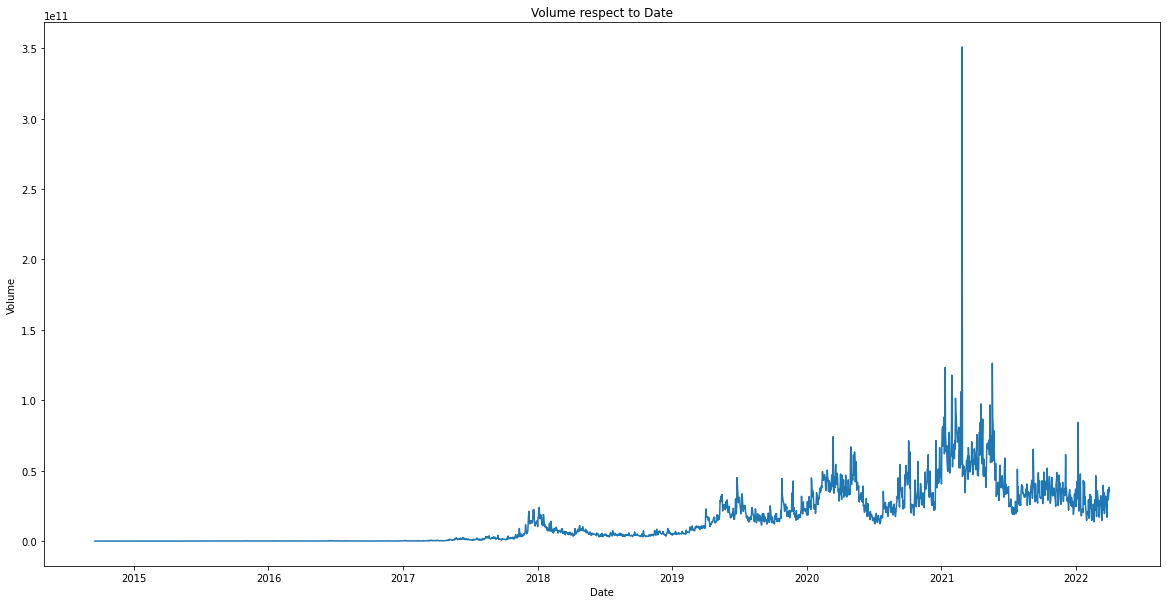

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Volume'])
plt.title("Volume respect to Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

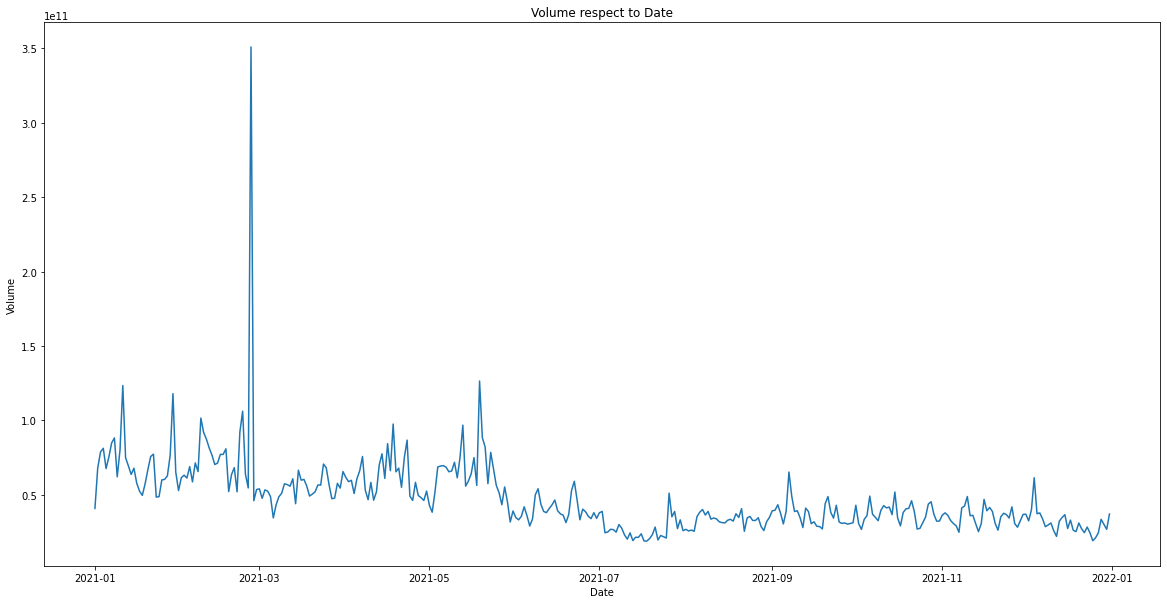

In [13]:
df_filtered = df[df.index.strftime('%Y') == '2021']
plt.figure(figsize=(20,10))
plt.plot(df_filtered.index, df_filtered['Volume'])
plt.title("Volume respect to Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [14]:
df_filtered = df[df.index.strftime('%Y-%m') == '2021-02']
print(df_filtered)

                    Open          High           Low         Close  \
Date                                                                 
2021-02-01  33114.578125  34638.214844  32384.228516  33537.175781   
2021-02-02  33533.199219  35896.882813  33489.218750  35510.289063   
2021-02-03  35510.820313  37480.187500  35443.984375  37472.089844   
2021-02-04  37475.105469  38592.175781  36317.500000  36926.066406   
2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   
2021-02-10  46469.761719  47145.566406  43881.152344  44918.183594   
2021-02-11  44898.710938  48463.468750  44187.761719  47909.332031   
2021-02-12  47877.035156  48745.734375  46424.976563  47504.851563   
2021-02-13  47491.20

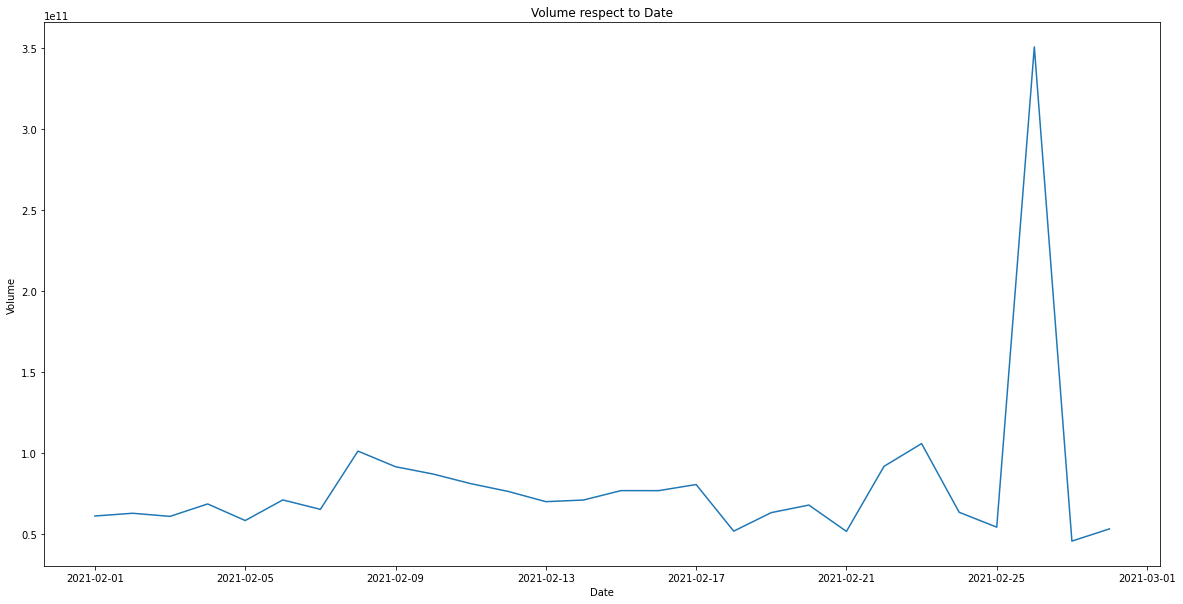

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_filtered.index, df_filtered['Volume'])
plt.title("Volume respect to Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

### Imputation

In [16]:
# run once
mean_vol = df['Volume'].mean()
print(mean_vol)

outliers = [x for x in df['Volume'] if x > mean_vol * 10]
print(outliers)

outliers_index = df.index[df['Volume']==outliers[0]].tolist()
print("Outlier values at:", outliers_index)

#(volume * satır - outlier) / satır - 1
imp_mean = (mean_vol * 2755 - df.at[outliers_index[0], 'Volume']) / 2754
print(imp_mean)

df.at[outliers_index[0], 'Volume'] = imp_mean
print("Imputed value:", df.at[outliers_index[0], 'Volume'])

14894427877.56225
[350967941479.0]
Outlier values at: [Timestamp('2021-02-26 00:00:00')]
14772396826.871822
Imputed value: 14772396826.871822


### Visualization of Features

In [17]:
df.plot(
    kind='line',
    x=df.index, 
    y='Volume',
    backend='plotly',
    title='Volume values respect to Date',   
    width=1000,
)

In [18]:
df.plot(
    kind='scatter',
    x=df.index, 
    y=['High', 'Low'],
    backend='plotly',
    title='High and Low values respect to Date',   
    width=1000,
)

In [19]:
df.plot(
    kind='box',
    x='Volume', 
    y=['High', 'Low'],
    backend='plotly',
    title='High and Low values respect to Volume',  
    width=1000,
)

In [20]:
df.plot(
    kind='scatter',
    x=df.index, 
    y=['Open', 'Close'],
    backend='plotly',
    title='Open and Close values respect to Date',  
    width=1000,
)

In [21]:
df.plot(
    kind='scatter',
    x='Volume', 
    y=['Open', 'Close'],
    backend='plotly',
    title='Open and Close values respect to Volume', 
    width=1000,
)

## Data Analysis

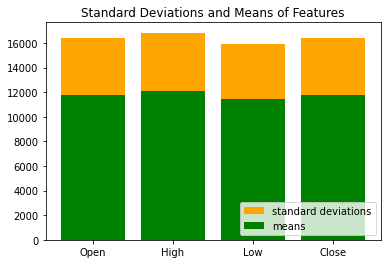

In [22]:
mean_y_axis = [df["Open"].mean(), df["High"].mean(), df["Low"].mean(), df["Close"].mean()]
std_y_axis = [df["Open"].std(), df["High"].std(), df["Low"].std(), df["Close"].std()]
features = ["Open", "High", "Low", "Close"]

plt.bar(features, std_y_axis, color="orange")
plt.bar(features, mean_y_axis, color="green")
plt.title("Standard Deviations and Means of Features")
plt.legend(["standard deviations", "means"], loc="lower right")
plt.show()

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999526  0.999121  0.998834   0.998834  0.750996
High       0.999526  1.000000  0.999051  0.999497   0.999497  0.754956
Low        0.999121  0.999051  1.000000  0.999391   0.999391  0.743382
Close      0.998834  0.999497  0.999391  1.000000   1.000000  0.750297
Adj Close  0.998834  0.999497  0.999391  1.000000   1.000000  0.750297
Volume     0.750996  0.754956  0.743382  0.750297   0.750297  1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

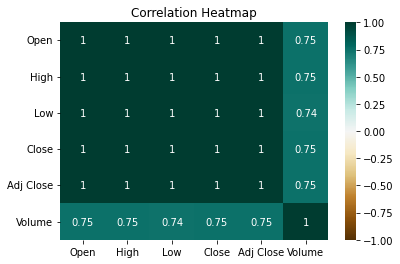

In [23]:
corr = df.corr()
print(corr)
heatmap = sns.heatmap(corr, cmap = "BrBG", vmin = -1, vmax = 1, annot=True)
heatmap.set_title("Correlation Heatmap")

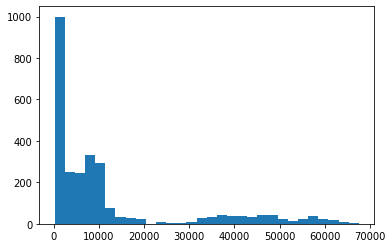

0      233.421997
1      314.079010
2      376.756989
3    17760.300781
dtype: float64

In [24]:
plt.hist(df["Open"], bins=30)
plt.show()

df["Open"].mean()
df["Open"].median()
df["Open"].mode()

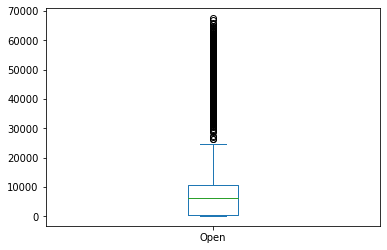

In [25]:
df["Open"].plot(kind="box" )

## Adding Features

### Adding New Features From Dataset: *https*://www.kaggle.com/datasets/kognitron/zielaks-bitcoin-historical-data-wo-nan

In [26]:
fname1 = 'bitstamp_cleaned.csv'
df1 = pd.read_csv(join(path_prefix, fname1), index_col='DateTime')

In [27]:
df1.index = pd.to_datetime(df1.index)
print(df1)

                     Unix_Timestamp      Open      High       Low     Close  \
DateTime                                                                      
2011-12-31 07:52:00      1325317920      4.39      4.39      4.39      4.39   
2011-12-31 15:50:00      1325346600      4.39      4.39      4.39      4.39   
2011-12-31 16:59:00      1325350740      4.50      4.57      4.50      4.57   
2011-12-31 17:00:00      1325350800      4.58      4.58      4.58      4.58   
2012-01-01 04:16:00      1325391360      4.58      4.58      4.58      4.58   
...                             ...       ...       ...       ...       ...   
2020-09-13 23:56:00      1600041360  10324.35  10325.89  10324.35  10325.89   
2020-09-13 23:57:00      1600041420  10331.41  10331.97  10326.68  10331.97   
2020-09-13 23:58:00      1600041480  10327.20  10331.47  10321.33  10331.47   
2020-09-13 23:59:00      1600041540  10330.02  10334.78  10328.64  10334.78   
2020-09-14 00:00:00      1600041600  10338.82  10338

In [28]:
df1.dtypes

Unix_Timestamp         int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [29]:
df1 = df1.drop(['Unix_Timestamp'], axis=1)

In [30]:
df1 = df1.resample('D').mean()
#df1.to_csv('groupedday.csv')

print(df1)

                    Open          High           Low         Close  \
DateTime                                                             
2011-12-31      4.465000      4.482500      4.465000      4.482500   
2012-01-01      4.806667      4.806667      4.806667      4.806667   
2012-01-02      5.000000      5.000000      5.000000      5.000000   
2012-01-03      5.252500      5.252500      5.252500      5.252500   
2012-01-04      5.200000      5.223333      5.200000      5.223333   
...                  ...           ...           ...           ...   
2020-09-10  10338.759708  10343.558552  10334.291588  10338.760864   
2020-09-11  10302.414327  10306.071361  10299.283936  10302.451926   
2020-09-12  10372.770434  10375.469839  10370.388713  10372.583252   
2020-09-13  10393.230099  10396.386007  10390.076996  10392.960134   
2020-09-14  10338.820000  10338.820000  10332.370000  10332.370000   

            Volume_(BTC)  Volume_(Currency)  Weighted_Price  
DateTime                   

In [31]:
# impute 2015-01-06, 2015-01-07, 2015-01-08
imp_data = df1.loc[:'2015-01-05']
cols = ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
dates = ['2015-01-06', '2015-01-07', '2015-01-08']

for date in dates:
  for col in cols:
    df1.loc[date][col] = imp_data[col].mean()
    
print(df1.loc[dates])

                  Open        High         Low       Close  Volume_(BTC)  \
DateTime                                                                   
2015-01-06  240.225766  240.447353  239.989197  240.223841      15.26004   
2015-01-07  240.225766  240.447353  239.989197  240.223841      15.26004   
2015-01-08  240.225766  240.447353  239.989197  240.223841      15.26004   

            Volume_(Currency)  Weighted_Price  
DateTime                                       
2015-01-06        3197.146838      240.211078  
2015-01-07        3197.146838      240.211078  
2015-01-08        3197.146838      240.211078  


In [32]:
# TAKE DATA IN RANGE 2014-09-17, 2020-09-14
df1 = df1.loc['2014-09-17':'2020-09-14']
#df1.to_csv('datainrange.csv')

print(df1)

                    Open          High           Low         Close  \
DateTime                                                             
2014-09-17    455.883222    456.129098    455.574168    455.875053   
2014-09-18    437.236250    437.695814    436.814572    437.222648   
2014-09-19    405.325879    405.830241    404.862636    405.321221   
2014-09-20    412.243217    412.603860    411.950899    412.257891   
2014-09-21    403.758673    403.975697    403.524634    403.758733   
...                  ...           ...           ...           ...   
2020-09-10  10338.759708  10343.558552  10334.291588  10338.760864   
2020-09-11  10302.414327  10306.071361  10299.283936  10302.451926   
2020-09-12  10372.770434  10375.469839  10370.388713  10372.583252   
2020-09-13  10393.230099  10396.386007  10390.076996  10392.960134   
2020-09-14  10338.820000  10338.820000  10332.370000  10332.370000   

            Volume_(BTC)  Volume_(Currency)  Weighted_Price  
DateTime                   

In [33]:
feature_df = df.loc['2014-09-17':'2020-09-14']
feature_cols = ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
for col in feature_cols:
  feature_df = feature_df.join(df1[col])

print(feature_df)
#feature_df.to_csv('addedfeature.csv')

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2020-09-10  10242.330078  10503.912109  10238.135742  10363.138672   
2020-09-11  10369.028320  10434.922852  10140.836914  10400.915039   
2020-09-12  10409.861328  10578.837891  10292.386719  10442.170898   
2020-09-13  10452.399414  10577.214844  10224.330078  10323.755859   
2020-09-14  10328.734375  10800.010742  10266.008789  10680.837891   

               Adj Close        Volume  Volume_(BTC)  Volume_(Currency)  \
Date          

### Adding a Feature From Dataset: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

In [34]:
fname2 = 'coin_Bitcoin.csv'
df2 = pd.read_csv(join(path_prefix, fname2), index_col='Date')

In [35]:
df2.index = pd.to_datetime(df2.index)
df2 = df2.resample('D').mean()

print(df2)

               SNo          High           Low          Open         Close  \
Date                                                                         
2013-04-29     1.0    147.488007    134.000000    134.444000    144.539993   
2013-04-30     2.0    146.929993    134.050003    144.000000    139.000000   
2013-05-01     3.0    139.889999    107.720001    139.000000    116.989998   
2013-05-02     4.0    125.599998     92.281898    116.379997    105.209999   
2013-05-03     5.0    108.127998     79.099998    106.250000     97.750000   
...            ...           ...           ...           ...           ...   
2021-07-02  2987.0  33939.588699  32770.680780  33549.600177  33897.048590   
2021-07-03  2988.0  34909.259899  33402.696536  33854.421362  34668.548402   
2021-07-04  2989.0  35937.567147  34396.477458  34665.564866  35287.779766   
2021-07-05  2990.0  35284.344430  33213.661034  35284.344430  33746.002456   
2021-07-06  2991.0  35038.536363  33599.916169  33723.509655  34

In [36]:
feature_df1 = df2.loc['2014-09-17':'2020-09-14']
feature_df = feature_df.join(feature_df1['Marketcap'])

print(feature_df)
#feature_df.to_csv('addedfeature.csv')

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2020-09-10  10242.330078  10503.912109  10238.135742  10363.138672   
2020-09-11  10369.028320  10434.922852  10140.836914  10400.915039   
2020-09-12  10409.861328  10578.837891  10292.386719  10442.170898   
2020-09-13  10452.399414  10577.214844  10224.330078  10323.755859   
2020-09-14  10328.734375  10800.010742  10266.008789  10680.837891   

               Adj Close        Volume  Volume_(BTC)  Volume_(Currency)  \
Date          

In [37]:
#feature_df.drop(['Volume'])
#feature_df

## Visualizations of Added Features

In [38]:
feature_df.plot(
    kind='scatter',
    x='Volume', 
    y=['Volume_(BTC)', 'Volume_(Currency)'],
    backend='plotly',
    title='Volume_(BTC) and Volume_(Currency) values respect to Volume', 
    width=1000,
)

In [39]:
feature_df.plot(
    kind='scatter',
    x='Weighted_Price', 
    y=['High', 'Low'],
    backend='plotly',
    title='High and Low values respect to Weighted Price', 
    width=1000,
)

In [40]:
feature_df.plot(
    kind='box',
    x='Weighted_Price', 
    y=['Open', 'Close'],
    backend='plotly',
    title='Open and Close values respect to Weighted Price', 
    width=1000,
)

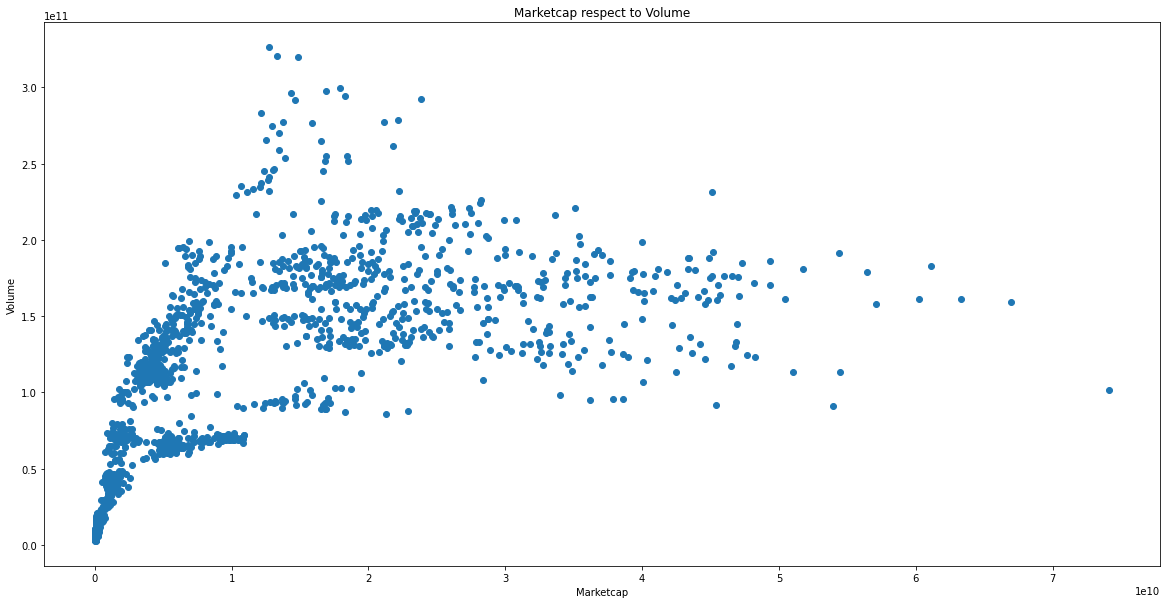

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(feature_df['Volume'], feature_df['Marketcap'])
plt.title("Marketcap respect to Volume")
plt.xlabel("Marketcap")
plt.ylabel("Volume")
plt.show()

##Statistical Analysis & Hypothesis Testing

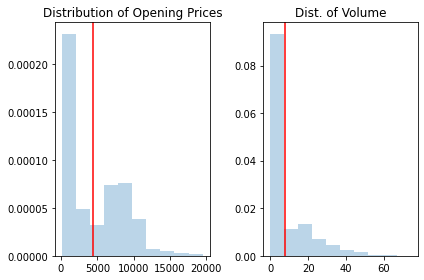

In [42]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title("Distribution of Opening Prices")
axes[0].hist(feature_df['Open'], alpha=0.3, density=True)
axes[0].axvline(feature_df['Open'].mean(), 0, 1, c="r")


axes[1].set_title("Dist. of Volume")
axes[1].hist(feature_df['Volume']/1000000000, alpha=0.3, density=True)
axes[1].axvline((feature_df['Volume']/1000000000).mean(), 0, 1, c="r")

plt.tight_layout()
plt.show()

The distributions are highly (positive) skewed and not normal. So, many statistical tests (T-test, Chi-squared) are not informative since they assume normal distribution.

####Correlation Tests



In [43]:
#Correlation between close feature and the openining price of the next day.

feature_df_copy = feature_df.copy() #edited
feature_df_copy["Close"] = feature_df_copy["Close"][:-1]
feature_df_copy["Open"] = feature_df_copy["Open"][1:]

feature_df_copy[["Close", "Open"]].corr()

,Close,Open
Close,1.000000,0.997612
Open,0.997612,1.000000


In [44]:
#Correlation between volume feature and the openining price of the next day.

feature_df_copy["Volume"] = feature_df_copy["Volume"][:-1]

feature_df_copy[["Volume", "Open"]].corr()

,Volume,Open
Volume,1.000000,0.694753
Open,0.694753,1.000000


The correlation between close feature and opening price of the next day is very strong and the features are not independent. The correlation between volume feature and the opening price of the next day is strong but not as much as the other one.

####T-tests (Two sided)
To check if there are significant differences between means of two groups

In [45]:
from scipy import stats
from scipy import special

#t-test of opening price and closing price of the same day
stats.ttest_ind(feature_df["Open"], feature_df["Close"], equal_var=False)

Ttest_indResult(statistic=-0.03668755015124795, pvalue=0.970735808141614)

Since p value is less than alpha = 0.05 (generally used size), we cannot reject that the means of opening and closing prices are the same. The p value is really high due to dependence of the features and the correlation between them. As a result, the t-test is not informative about the significance of differences between means of the features.

####ANOVA
To check if there are significant differences between means of three or more groups

In [46]:
from scipy.stats import f_oneway

#test to check if there exist significant differences between different months of a single year
#in this case, the mean values of open feature in different months of 2017 are tested
jan2017 = feature_df.loc['2017-01-01':'2017-01-31']["Open"]
feb2017 = feature_df.loc['2017-02-01':'2017-02-28']["Open"]
mar2017 = feature_df.loc['2017-03-01':'2017-03-31']["Open"]
apr2017 = feature_df.loc['2017-04-01':'2017-04-30']["Open"]
may2017 = feature_df.loc['2017-05-01':'2017-05-31']["Open"]
jun2017 = feature_df.loc['2017-06-01':'2017-06-30']["Open"]
jul2017 = feature_df.loc['2017-07-01':'2017-07-31']["Open"]
aug2017 = feature_df.loc['2017-08-01':'2017-08-31']["Open"]
sep2017 = feature_df.loc['2017-09-01':'2017-09-30']["Open"]
oct2017 = feature_df.loc['2017-10-01':'2017-10-31']["Open"]
nov2017 = feature_df.loc['2017-11-01':'2017-11-30']["Open"]
dec2017 = feature_df.loc['2017-12-01':'2017-12-31']["Open"]

f_oneway(jan2017, feb2017, mar2017, apr2017, may2017, jun2017, jul2017, aug2017, sep2017, oct2017, nov2017, dec2017)

F_onewayResult(statistic=684.1663720321192, pvalue=1.9468549770760234e-230)

The f statistic is high thus, the variation between sample means is higher than the variation within the samples. The p value is very low. So, we cannot reject that significant differences do not exist between the mean values of the months of 2017.

In [47]:
#test to check if there exist significant differences between same months of different years
#in this case, the mean values of close feature of december in different years are tested

dec2014 = feature_df.loc['2014-12-01':'2014-12-31']["Close"]
dec2015 = feature_df.loc['2015-12-01':'2015-12-31']["Close"]
dec2016 = feature_df.loc['2016-12-01':'2016-12-31']["Close"]
dec2017 = feature_df.loc['2017-12-01':'2017-12-31']["Close"]
dec2018 = feature_df.loc['2018-12-01':'2018-12-31']["Close"]
dec2019 = feature_df.loc['2019-12-01':'2019-12-31']["Close"]

f_oneway(dec2014, dec2015, dec2016, dec2017, dec2018, dec2019)

F_onewayResult(statistic=1094.0434974305915, pvalue=1.2148267113606764e-132)

The same things can be said for this test. The f statistic is even higher. The p value is still low that rejection of having same means in all Decembers between 2014-2019 is unavoidable.

###Hypothesis Testing

Utilizing the new features added to the main dataset

---1---

Null Hypothesis (H0): Volume(BTC) and Weighted Price are correlated

H0: the increase rate is the same 

Alternative Hypothesis (H1): Volume(BTC) and Weighted Price are not correlated

H1: the increase rate is different

In [48]:
#adding volume(BTC) differences between days to a list day by day
vol1 = []
vol2 = []
for i in feature_df.index:
  vol1.append(abs(feature_df["Volume_(BTC)"][i]))
  vol2.append(abs(feature_df["Volume_(BTC)"][i]))
vol1 = vol1[1:]
vol2 = vol2[:-1]

vol_diff = []
for i in range(len(vol1)):
  vol_diff.append(abs(vol1[i]-vol2[i]))

#adding weighted price differences between days to a list day by day
wPrice1 = []
wPrice2 = []
for i in feature_df.index:
  wPrice1.append(abs(feature_df["Weighted_Price"][i]))
  wPrice2.append(abs(feature_df["Weighted_Price"][i]))
wPrice1 = wPrice1[1:]
wPrice2 = wPrice2[:-1]

wPrice_diff = []
for i in range(len(wPrice1)):
  wPrice_diff.append(abs(wPrice1[i]-wPrice2[i]))

#doing a two sided t-test with the generated lists
t_value, p_value = stats.ttest_ind(vol_diff, wPrice_diff, equal_var=False)
print("t-statistic: ", t_value, " p value: ", p_value)

if p_value <= 0.05:
  print("p value is less than the significance level of 0.05, so the null hypothesis is rejected. The features are not correlated.")
else:
  print("p value is greater than the significance level of 0.05, so the null hypothesis cannot be rejected.")


t-statistic:  -23.71204368807599  p value:  8.00101495899209e-111
p value is less than the significance level of 0.05, so the null hypothesis is rejected. The features are not correlated.


---2---

Null Hypothesis (H0): Volume(Currency) and Market Cap are correlated

H0: the increase rate is the same

Alternative Hypothesis (H1): Volume(Currency) and Market Cap are not correlated

H1: the increase rate is different

In [49]:
#adding volume(Currency) differences between days to a list day by day
vol1b = []
vol2b = []
for i in feature_df.index:
  vol1b.append(abs(feature_df["Volume_(Currency)"][i]))
  vol2b.append(abs(feature_df["Volume_(Currency)"][i]))
vol1b = vol1b[1:]
vol2b = vol2b[:-1]

volb_diff = []
for i in range(len(vol1b)):
  volb_diff.append(abs(vol1b[i]-vol2b[i]))

#adding marketcap differences between days to a list day by day
MCap1 = []
MCap2 = []
for i in feature_df.index:
  MCap1.append(abs(feature_df["Marketcap"][i]))
  MCap2.append(abs(feature_df["Marketcap"][i]))
MCap1 = MCap1[1:]
MCap2 = MCap2[:-1]

MCap_diff = []
for i in range(len(MCap1)):
  MCap_diff.append(abs(MCap1[i]-MCap2[i]))

#doing a two sided t-test with the generated lists
t_value, p_value = stats.ttest_ind(volb_diff, MCap_diff, equal_var=False)
print("t-statistic: ", t_value, " p value: ", p_value)

if p_value <= 0.05:
  print("p value is less than the significance level of 0.05, so the null hypothesis is rejected. The features are not correlated.")
else:
  print("p value is greater than the significance level of 0.05, so the null hypothesis cannot be rejected.")

t-statistic:  -23.500064434995775  p value:  4.443113223843926e-109
p value is less than the significance level of 0.05, so the null hypothesis is rejected. The features are not correlated.


## Machine Learning

In [50]:
import math
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from numpy import array

In [51]:
mldf = feature_df.copy()

mldf.reset_index(inplace=True)
mldf = mldf.rename(columns = {'index':'Date'})

mldf

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_(BTC),Volume_(Currency),Weighted_Price,Marketcap
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,10.926247,4958.391020,455.788240,6.073910e+09
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,18.144642,7790.259885,437.225006,5.638919e+09
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,23.120311,9237.917374,405.332429,5.246780e+09
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,15.439167,6391.180254,412.256643,5.436072e+09
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,12.060132,4846.733741,403.724109,5.303651e+09
...,...,...,...,...,...,...,...,...,...,...,...
2185,2020-09-10,10242.330078,10503.912109,10238.135742,10363.138672,10363.138672,5.440644e+10,7.119214,73621.083972,10339.359896,1.915684e+11
2186,2020-09-11,10369.028320,10434.922852,10140.836914,10400.915039,10400.915039,4.520112e+10,3.660672,37706.667029,10303.242947,1.922758e+11
2187,2020-09-12,10409.861328,10578.837891,10292.386719,10442.170898,10442.170898,3.675008e+10,1.754713,18200.013902,10373.259995,1.930495e+11
2188,2020-09-13,10452.399414,10577.214844,10224.330078,10323.755859,10323.755859,3.650685e+10,3.056612,31635.949638,10393.662602,1.908708e+11


### Random Forest

In [52]:
rfdf = mldf.copy()

In [53]:
features = ['High', 'Low', 'Volume', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Marketcap', 'Close', 'Adj Close']
X = rfdf[features]
y = rfdf['Open']

In [54]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [55]:
rf_pred = rf_model.predict(val_X)

print(rf_model.predict(X.tail()))
#print(rf_model.predict(X))
mldf['Open'].tail()
#mldf['Open']

[10273.18047846 10279.15244142 10400.48257803 10431.73423822
 10376.41108398]


2185    10242.330078
2186    10369.028320
2187    10409.861328
2188    10452.399414
2189    10328.734375
Name: Open, dtype: float64

In [56]:
rf_val_mae = mean_absolute_error(val_y,rf_pred)
rf_val_mse = math.sqrt(mean_squared_error(val_y, rf_pred))
rf_val_mape = mean_absolute_percentage_error(val_y, rf_pred)

print('Mean Absolute Error - MAE: ', rf_val_mae)
print('Root Mean Squared Error - RMSE: ', rf_val_mse)
print('Mean Absolute Percentage Error - MAPE: ', rf_val_mape)

Mean Absolute Error - MAE:  88.32615626602744
Root Mean Squared Error - RMSE:  228.55523737614786
Mean Absolute Percentage Error - MAPE:  0.01660047520591085


### Hyperparameter Tuning

Hyperparameter tuning function taken from: https://www.kaggle.com/code/felipefiorini/xgboost-hyper-parameter-tuning/notebook

In [57]:
from sklearn.model_selection import GridSearchCV

#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

### XGBoost

In [58]:
xgbdf = mldf.copy()

In [59]:
features = ['High', 'Low', 'Volume', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Marketcap', 'Close', 'Adj Close']
X = xgbdf[features]
y = xgbdf['Open']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=False, test_size=0.3)

In [60]:
#hyperParameterTuning(X_train, y_train)

In [61]:
#my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, objective='reg:squarederror')
my_model = XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective='reg:squarederror', subsample=0.5)

my_model.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=10,
             min_child_weight=5, n_estimators=500, objective='reg:squarederror',
             subsample=0.5)

In [62]:
predictions = my_model.predict(X_valid)

print(my_model.predict(X.tail()))
mldf['Open'].tail()

[10568.819 10565.198 10648.806 10590.886 10694.478]


2185    10242.330078
2186    10369.028320
2187    10409.861328
2188    10452.399414
2189    10328.734375
Name: Open, dtype: float64

In [63]:
xgb_val_mae = mean_absolute_error(predictions, y_valid)
xgb_val_mse = math.sqrt(mean_squared_error(predictions, y_valid))
xgb_val_mape = mean_absolute_percentage_error(predictions, y_valid)

print("Mean Absolute Error - MAE: ", xgb_val_mae)
print('Root Mean Squared Error - RMSE: ', xgb_val_mse)
print('Mean Absolute Percentage Error - MAPE: ', xgb_val_mape)

Mean Absolute Error - MAE:  157.1446516329195
Root Mean Squared Error - RMSE:  236.3054132818504
Mean Absolute Percentage Error - MAPE:  0.019453210653117926


### Predict Data of a Single Day Given Previous 30 Days

Predicting opening price at 2020-09-14 given previous 30 days

In [64]:
opendf = mldf.iloc[2159:2190]

opendf.shape

(31, 11)

In [65]:
features = ['High', 'Low', 'Volume', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Marketcap', 'Close', 'Adj Close']
X = opendf[features]
y = opendf['Open']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=False, test_size=0.3)

In [66]:
#hyperParameterTuning(X_train, y_train)

In [67]:
my_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective='reg:squarederror', subsample=0.5)

my_model.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, objective='reg:squarederror', subsample=0.5)

In [68]:
predictions = my_model.predict(X_valid)

print(my_model.predict(X.tail()))
opendf['Open'].tail()

[10326.253 10329.741 10311.557 10312.781 10314.485]


2185    10242.330078
2186    10369.028320
2187    10409.861328
2188    10452.399414
2189    10328.734375
Name: Open, dtype: float64

In [69]:
xgb_val_mae = mean_absolute_error(predictions, y_valid)
xgb_val_mse = math.sqrt(mean_squared_error(predictions, y_valid))
xgb_val_mape = mean_absolute_percentage_error(predictions, y_valid)

print("Mean Absolute Error - MAE: ", xgb_val_mae)
print('Root Mean Squared Error - RMSE: ', xgb_val_mse)
print('Mean Absolute Percentage Error - MAPE: ', xgb_val_mape)

Mean Absolute Error - MAE:  102.23857416874998
Root Mean Squared Error - RMSE:  122.65134469664125
Mean Absolute Percentage Error - MAPE:  0.009891270181629054


Predicted price at 2020-09-14: 10314.237

Real price at 2020-09-14: 10328.734375


### Predict Trends of All Features From 09 March 2022 to 09 September 2022

In [70]:
futuredf = pd.date_range(start='03/09/2022', end='09/09/2022')
futuredates = pd.DataFrame(futuredf, columns=['Date'])
topredict = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for feature in topredict:
  futuredates[feature] = np.nan

futuredates_copy = futuredates.copy()
futuredates_copy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-09,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-11,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
180,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN
181,2022-09-06,NaN,NaN,NaN,NaN,NaN,NaN
182,2022-09-07,NaN,NaN,NaN,NaN,NaN,NaN
183,2022-09-08,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_new = df.loc['2020-06-20':]

df_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,9332.340820,1.713054e+10
2020-06-21,9330.926758,9401.107422,9300.430664,9303.629883,9303.629883,1.532430e+10
2020-06-22,9300.915039,9655.073242,9296.872070,9648.717773,9648.717773,2.110401e+10
2020-06-23,9644.076172,9670.541016,9547.247070,9629.658203,9629.658203,1.700643e+10
2020-06-24,9632.149414,9680.367188,9278.233398,9313.610352,9313.610352,1.896172e+10
...,...,...,...,...,...,...
2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,3.139706e+10
2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,2.933388e+10
2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,3.332743e+10


In [72]:
features = ['Open', 'High', 'Low', 'Volume', 'Close', 'Adj Close']

In [73]:
for target in topredict:
  if target in features:
    features.remove(target)

  X = df_new[features]
  y = df_new[target]

  print("Target:", target)

  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
                                     
  my_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
  
  my_model.fit(X_train, y_train)

  predictions = my_model.predict(X_test)
  print(my_model.predict(X.tail()))
  print(df_new[target].tail())

  futuredates_copy[target] = pd.Series(predictions)

  xgb_val_mae = mean_absolute_error(predictions, y_test)
  xgb_val_mse = math.sqrt(mean_squared_error(predictions, y_test))
  xgb_val_mape = mean_absolute_percentage_error(predictions, y_test)

  print("Mean Absolute Error - MAE: ", xgb_val_mae)
  print('Root Mean Squared Error - RMSE: ', xgb_val_mse)
  print('Mean Absolute Percentage Error - MAPE: ', xgb_val_mape)

  features.append(target)

Target: Open
[47372.527 47141.016 46628.066 45479.082 46043.875]
Date
2022-03-29    47100.437500
2022-03-30    47456.898438
2022-03-31    47062.148438
2022-04-01    45554.164063
2022-04-02    46168.101563
Name: Open, dtype: float64
Mean Absolute Error - MAE:  861.7387794897961
Root Mean Squared Error - RMSE:  1176.3467472711882
Mean Absolute Percentage Error - MAPE:  0.01781455427028389
Target: High
[48344.426 48120.574 47480.547 47379.832 47672.766]
Date
2022-03-29    48022.289063
2022-03-30    47655.148438
2022-03-31    47512.027344
2022-04-01    46616.242188
2022-04-02    47003.429688
Name: High, dtype: float64
Mean Absolute Error - MAE:  748.1155133826533
Root Mean Squared Error - RMSE:  1064.624103958983
Mean Absolute Percentage Error - MAPE:  0.014890739883826696
Target: Low
[46191.473 46428.285 45594.613 44144.84  44831.535]
Date
2022-03-29    47100.437500
2022-03-30    46746.210938
2022-03-31    45390.539063
2022-04-01    44403.140625
2022-04-02    46157.980469
Name: Low, dtype

#### Visualization of Predicted Values

In [74]:
futuredates_copy.plot(
    kind='line',
    x='Date', 
    y=['High', 'Low', 'Open', 'Close'],
    backend='plotly',
    title='Predicted Values respect to Date', 
    width=1000,
)

In [75]:
futuredates_copy.plot(
    kind='line',
    x='Date', 
    y='Volume',
    backend='plotly',
    title='Predicted Volume respect to Date', 
    width=1000,
)

### Recommendation System

In [251]:
from datetime import date

def recommendFunc():
  dateinput = input("Enter date in Y-m-d format ")
  year, month, day = dateinput.split("-")

  dateobj = date(int(year), int(month), int(day))
  d1 = date(2022,4,2)
  d2 = date(2014,10,16)

  if d2 <= dateobj <= d1:
    func_df = df.copy()
    func_df = func_df.loc[:dateobj]
    func_df = func_df.tail(30)

    #print(func_df)

    features = ['Open', 'Close', 'Volume']

    X = func_df[features]
    y = func_df['Close']

    X.drop(X.tail(1).index,inplace=True) # drop last n rows
    y.drop(y.tail(1).index,inplace=True)

    #print(X)

    my_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective='reg:squarederror', subsample=0.7)

    my_model.fit(X, y)

    last_day = func_df[features].tail(1)

    #print(last_day)

    prediction = my_model.predict(last_day)

    print("Predicted Value at date:",dateobj,"is: ", float(prediction))

    last_day_compare = X['Close'][-1]
    print("Value a day before prediction: ", last_day_compare)

    if prediction >= last_day_compare:
      print("Buy")
    else:
      print("Sell")

  else:
    print("Invalid Date!")

In [252]:
recommendFunc()

Enter date in Y-m-d format 2022-03-31
Predicted Value at date: 2022-03-31 is:  46786.375
Value a day before prediction:  47062.664063
Sell


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Conclusion

In conclusion, we explored and analyzed the historical data of Bitcoin and its features. In addition to the main dataset, other datasets are also used to introduce new features. The features are combined and visualized. Afterwards, statistical analyzes are done to verify if significant differences exist between features. Hypothesis testing showed that the new features are not correlated unlike the features in the main dataset. As for the third part machine learning, random forest and XGBoost models are used. Random forest yielded to Mean Absolute Percentage Error of 0.01746 while XGBoost gave us Mean Absolute Percentage Error of 0.01945 when they worked for the whole data. When the the prediction was done according to the previous 30 days, the Mean Absolute Percentage Error was lower as expected.